# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

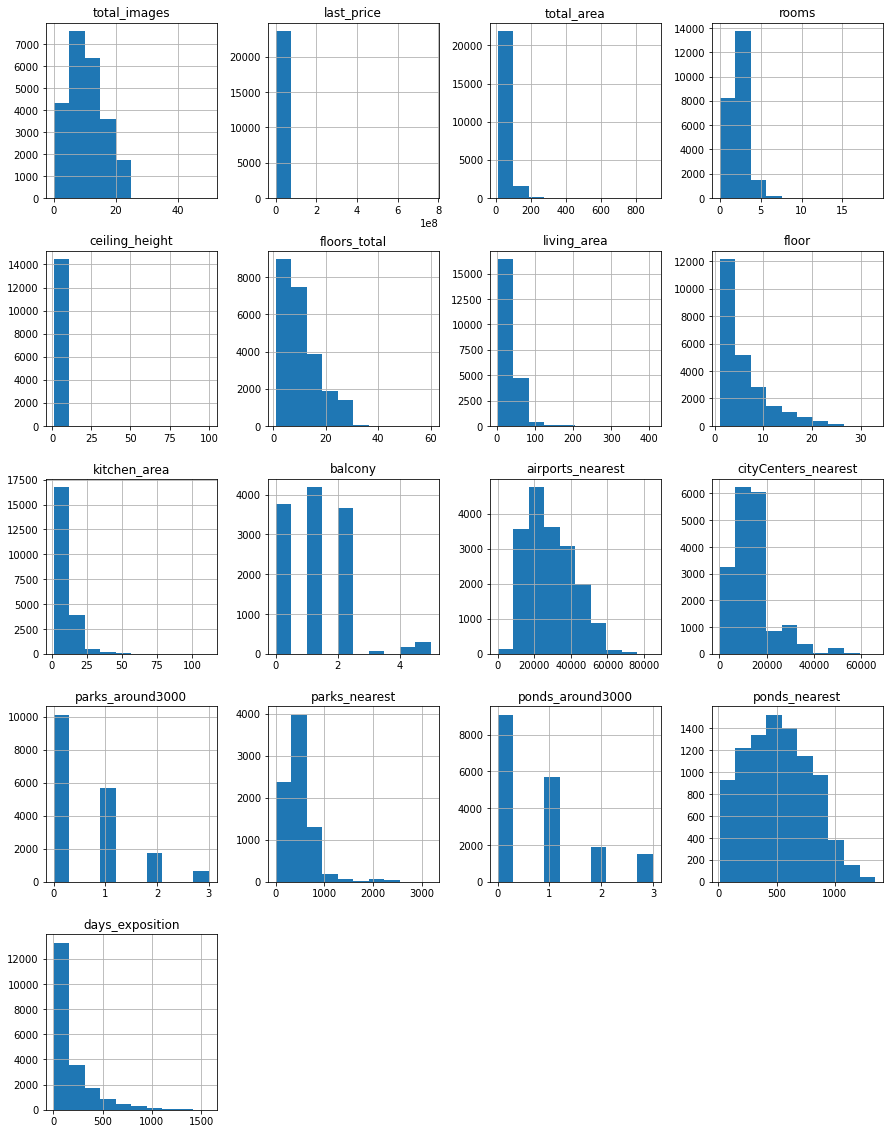

In [2]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #sep='\t' для лучшей читабельности
data.info() #вывод информации
data.hist(figsize=(15, 20));

В данных обнаружены пропуски. Для того чтобы заполнить пропущенные значения в данных, были использованы методы pandas isna() и fillna(), в столбце  first_day_exposition обнаружен неверный тип данных. После обработки значений в данных можно приступать к анализу данных.

### Предобработка данных

In [3]:
data.isna().sum() #Определим, в каких столбцах есть пропуски.
data['balcony'] = data['balcony'].fillna(0) #заменим все пропущенные значения в столбце ‘balcony’ на 0

Пропуски в данных могут быть вызваны различными факторами. В случае с пропусками в данных по балконам, возможны следующие причины:
**Продавец не указал число балконов по ошибке или может быть забыл об этом.**  
**В квартире действительно нет балконов.**  
**Продавец не указал число балконов, потому что считает это несущественной информацией.**  

In [4]:
print(data.dtypes)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data['is_apartment'].unique()) #узнаем, какие значения содержатся в столбце ‘is_apartment’, методом unique
data['is_apartment'] = data['is_apartment'].astype('bool')

data['locality_name'].unique()
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок').str.replace('городской посёлок',\
'поселок').str.replace('посёлок', 'поселок') #используем метод str.replace() для замены одной подстроки на другую 
data['locality_name'].unique()

print(data['ceiling_height'].describe()) #среднее значение равно 2.77 метра, а максимальное значение равно 100 метров. Это говорит о том, что в столбце есть выбивающиеся значения
median_ceiling_height = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = median_ceiling_height #заменим выбивающиеся значения (высоту более 5 метров),на медиану


total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object
[nan False True]
count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


In [5]:
median_ceiling_height = data['ceiling_height'].median() #заполним все пропущенные значения в столбце ceiling_height медианным значением
data['ceiling_height'].fillna(median_ceiling_height, inplace=True) 

In [6]:
data['balcony'] = data['balcony'].astype('Int64')

Столбец ‘first_day_exposition’ имеет тип данных ‘object’, хотя это дата. Изменим тип данных столбца на дату.
Столбец ‘is_apartment’ имеет тип данных ‘object’, хотя это булево значение

Используем медиану для замены выбивающихся значений на более типичные значения. 
Таким образом, все выбивающиеся значения будут заменены на одно и то же значение - медиану

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64



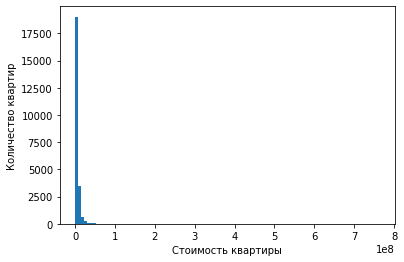

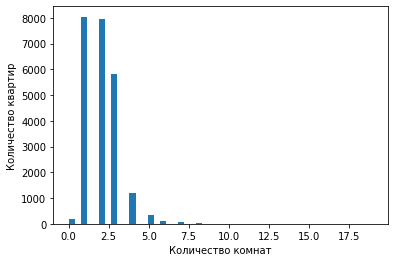

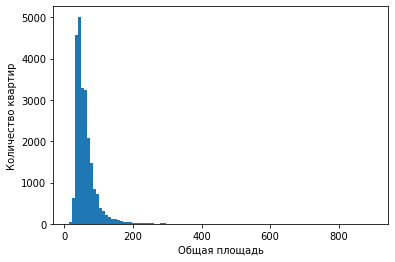

In [7]:
print(data['last_price'].describe())
print()
print(data['rooms'].describe())
print()
print(data['total_area'].describe())
print()

# Столбец со стоимостью квартиры
plt.hist(data['last_price'], bins=100)
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show()

# Столбец с количеством комнат
plt.hist(data['rooms'], bins=50)
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

# Столбец с общей площадью
plt.hist(data['total_area'], bins=100)
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.show()

In [8]:
old_data=data
data=old_data[(old_data['last_price'] < 10000000) & (old_data['rooms'] < 10) & (old_data['total_area'] < 500)] 
print(data.shape[0] / old_data.shape[0])

0.8826110806363138


Получается отброшено 12% данных

### Посчитайте и добавьте в таблицу новые столбцы

In [9]:
data['price_meter'] = data['last_price'] / data['total_area'] #узнаем цену за квадратный метр. Для этого разделим стоимость квартиры на общую площадь квартиры
data['weekday'] = data['first_day_exposition'].dt.weekday #узнаем день недели публикации объявления. Для этого мы использовали метод dt.weekday, который возвращает номер дня недели (0 — понедельник, 1 — вторник и так далее).
data['month'] = data['first_day_exposition'].dt.month #месяц публикации объявления
data['year'] = data['first_day_exposition'].dt.year #год публикации объявления
def floor_level(row):       
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
#И ее вызов:
data['floor_level'] = data[['floor', 'floors_total']].apply(floor_level, axis=1) #Столбец floor_level добавим для того, 
# чтобы узнать тип этажа квартиры (первый, последний или другой). Для этого мы создали функцию с названием floor_type, которая принимает 
# строку из таблицы и возвращает тип этажа. В вызове применим эту функцию к каждой строке таблицы с помощью метода apply, с применением
# с применением к каждой строке axis=1
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round() #узнаем расстояние до центра города в километрах. 
#Для этого мы разделили расстояние до центра города на 1000 и округлили до целых значений с помощью метода round()

/tmp/ipykernel_599/484495548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_meter'] = data['last_price'] / data['total_area'] #узнаем цену за квадратный метр. Для этого разделим стоимость квартиры на общую площадь квартиры
/tmp/ipykernel_599/484495548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['weekday'] = data['first_day_exposition'].dt.weekday #узнаем день недели публикации объявления. Для этого мы использовали метод dt.weekday, который возвращает номер дня недели (0 — понед

### Проведите исследовательский анализ данных

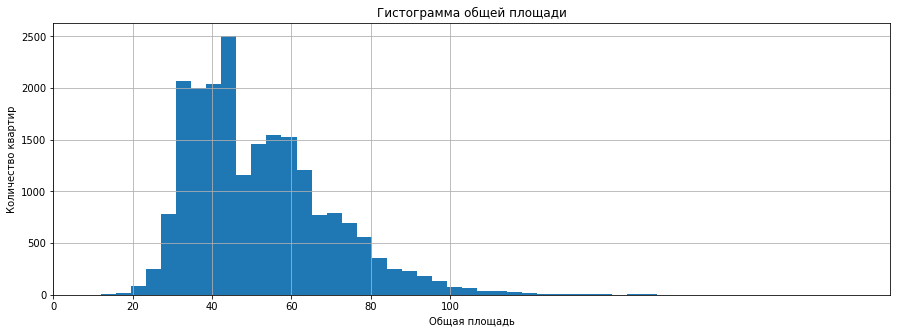

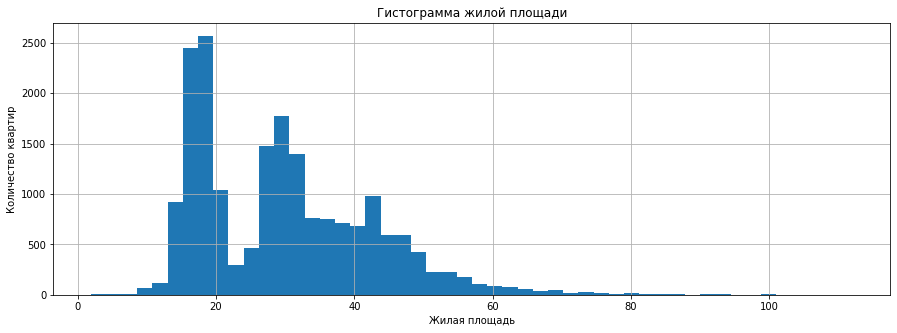

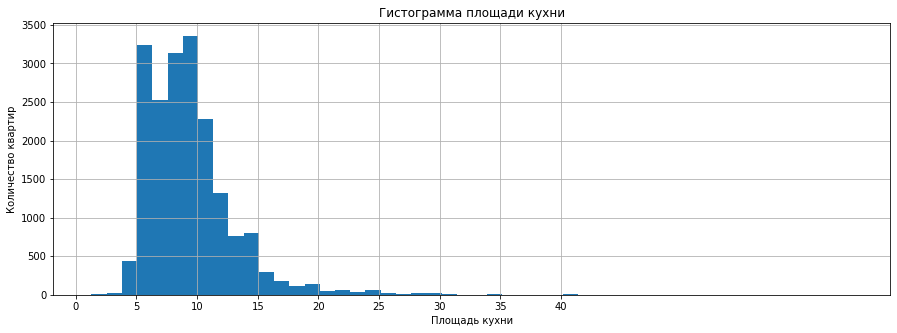

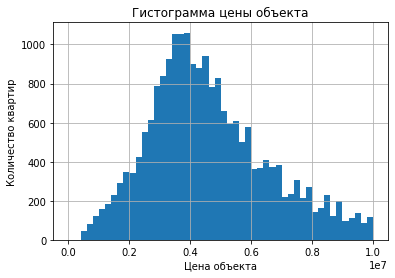

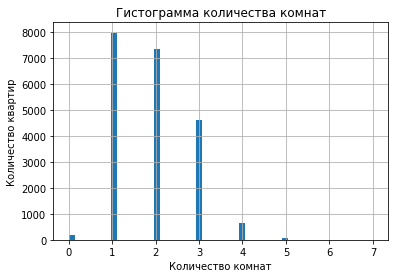

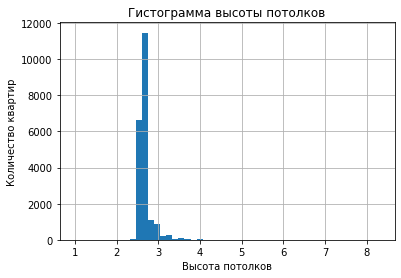

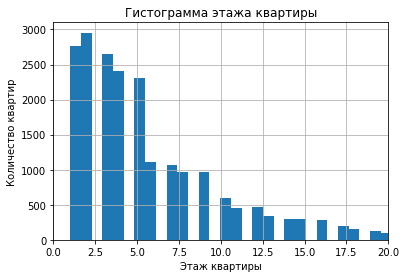

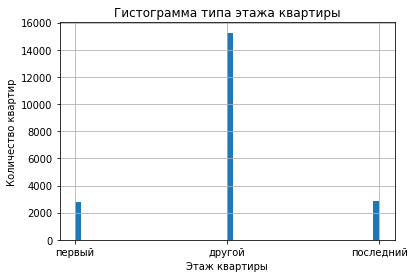

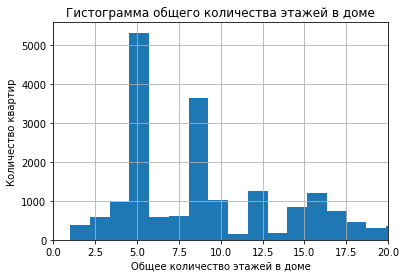

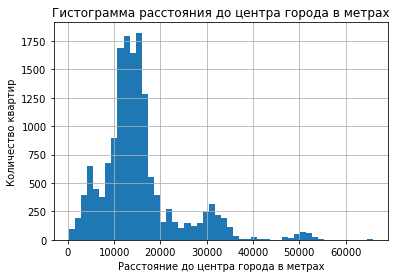

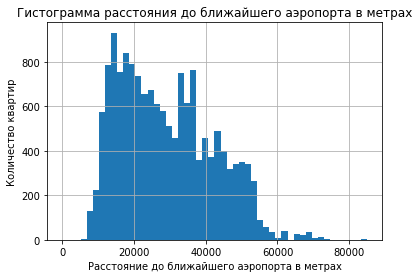

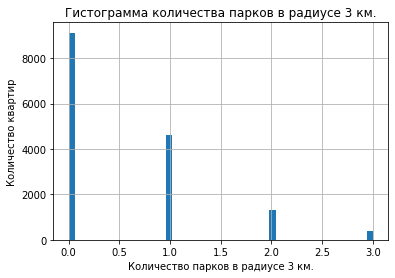

/tmp/ipykernel_599/1865491482.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
/tmp/ipykernel_599/1865491482.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['first_day_exposition'].dt.month
/tmp/ipykernel_599/1865491482.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

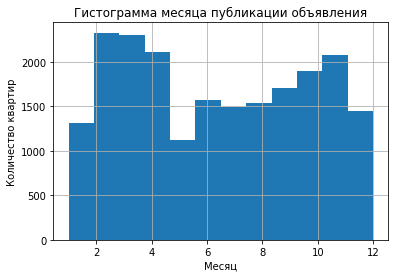

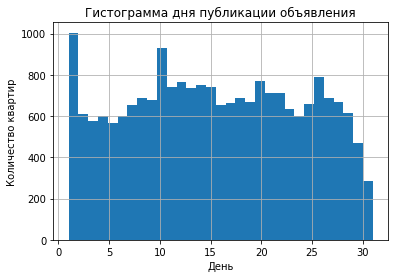

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
data['total_area'].hist(bins=50)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество квартир')
plt.xticks(range(0, 101, 20))
plt.show()

plt.figure(figsize=(15, 5))
data['living_area'].hist(bins=50)
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество квартир')
plt.xticks(range(0, 120, 20))
plt.show()

plt.figure(figsize=(15, 5))
data['kitchen_area'].hist(bins=50)
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.xticks(range(0, 41, 5))
plt.show()

data['last_price'].hist(bins=50)
plt.title('Гистограмма цены объекта')
plt.xlabel('Цена объекта')
plt.ylabel('Количество квартир')
plt.show()

data['rooms'].hist(bins=50)
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

data['ceiling_height'].hist(bins=50)
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

data['floor'].hist(bins=50)
plt.title('Гистограмма этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.xlim(0, 20)
plt.show()

data['floor_level'].hist(bins=50)
plt.title('Гистограмма типа этажа квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()

data['floors_total'].hist(bins=50)
plt.title('Гистограмма общего количества этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество квартир')
plt.xlim(0, 20)
plt.show()

data['cityCenters_nearest'].hist(bins=50)
plt.title('Гистограмма расстояния до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

data['airports_nearest'].hist(bins=50)
plt.title('Гистограмма расстояния до ближайшего аэропорта в метрах')
plt.xlabel('Расстояние до ближайшего аэропорта в метрах')
plt.ylabel('Количество квартир')
plt.show()

data['parks_around3000'].hist(bins=50)
plt.title('Гистограмма количества парков в радиусе 3 км.')
plt.xlabel('Количество парков в радиусе 3 км.')
plt.ylabel('Количество квартир')
plt.show()

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['month'] = data['first_day_exposition'].dt.month
data['day'] = data['first_day_exposition'].dt.day

data['month'].hist(bins=12)
plt.title('Гистограмма месяца публикации объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

data['day'].hist(bins=31)
plt.title('Гистограмма дня публикации объявления')
plt.xlabel('День')
plt.ylabel('Количество квартир')
plt.show()


 Общая площадь: большинство квартир имеют площадь от 40 до 50 квадратных метров.
- Жилая площадь: большинство квартир имеют жилую площадь от 10 до 40 квадратных метров.
- Площадь кухни: большинство квартир имеют площадь кухни от 5 до 15 квадратных метров.
- Цена объекта: большинство квартир стоят до 1 миллиона рублей.
- Количество комнат: большинство квартир имеют от 1 до 3 комнат.
- Высота потолков: большинство квартир имеют высоту потолков от 2.5 до 3 метров.
- Этаж квартиры: большинство квартир находятся от 1 до 5  этажа.
- Тип этажа квартиры: большинство квартир находятся на другом этаже.
- Общее количество этажей в доме: большинство домов имеют 5 и 9 этажей.
- Расстояние до центра города в метрах: большинство квартир находятся в пределах 10-15 километров от центра города.
- Расстояние до ближайшего аэропорта: большинство квартир находятся в пределах 20 километров от ближайшего аэропорта.
- Расстояние до ближайшего парка: большинство квартир находятся в пределах 1 километра от ближайшего парка.
- День и месяц публикации объявления: количество объявлений достигает пика в первые дни и в десятых числах месяца и уменьшается
    по мере приближения к концу месяца. Больше всего объявлений было опубликовано весной и осенью.

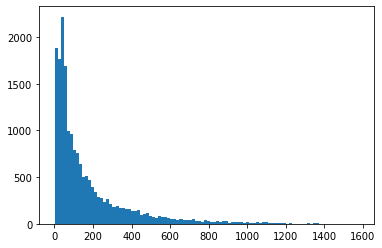

91.0

In [11]:
plt.hist(data['days_exposition'], bins=100)
plt.show()
data['days_exposition'].mean()
data['days_exposition'].median()

Среднее значение равно: 180 дней
Медиана равна: 95 дней
По графику видим, что обычно продажа занимает от 1 до 3 месяцев. Продажи, которые занимают менее 45 дней, можно считать быстрыми, а продажи, которые занимают более 230 дней, можно считать необычно долгими.
Если среднее значение и медиана близки друг к другу, то это означает, что данные распределены примерно равномерно. Если среднее значение больше медианы, то это означает, что данные имеют длинный хвост вправо и содержат несколько очень долгих продаж. Если медиана больше среднего значения, то это означает, что данные имеют длинный хвост влево и содержат несколько очень быстрых продаж, что мы можем видеть на гистограмме.

In [12]:
# Общая площадь
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='mean')
# Жилая площадь
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='mean')
# Площадь кухни
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='mean')
# Количество комнат
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
# Этаж, на котором расположена квартира (первый, последний, другой)
pivot_floor_category = data.pivot_table(index='floor_level', values='last_price', aggfunc='mean')
# Дата размещения (день недели, месяц, год)
pivot_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='mean')
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc='mean')
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc='mean')

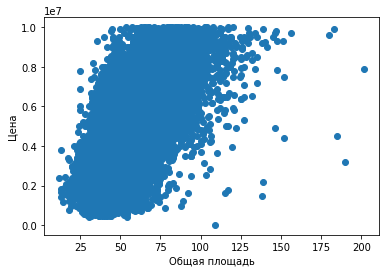

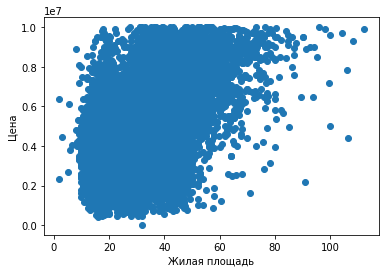

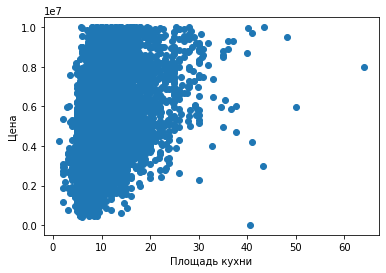

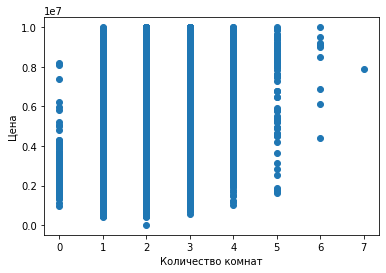

In [13]:
# Общая площадь
plt.scatter(data['total_area'], data['last_price'])
plt.xlabel('Общая площадь')
plt.ylabel('Цена')
plt.show()

# Жилая площадь
plt.scatter(data['living_area'], data['last_price'])
plt.xlabel('Жилая площадь')
plt.ylabel('Цена')
plt.show()

# Площадь кухни
plt.scatter(data['kitchen_area'], data['last_price'])
plt.xlabel('Площадь кухни')
plt.ylabel('Цена')
plt.show()

# Количество комнат
plt.scatter(data['rooms'], data['last_price'])
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.show()

# Этаж, на котором расположена квартира (первый, последний, другой)
#plt.scatter(data['floor_level'], data['last_price'])
#plt.xlabel('Этаж')
#plt.ylabel('Цена')
#plt.show()

# Дата размещения (день недели, месяц, год)
#plt.scatter(data['weekday'], data['last_price'])
#plt.xlabel('День недели')
#plt.ylabel('Цена')
#plt.show()

#plt.scatter(data['month'], data['last_price'])
#plt.xlabel('Месяц')
#plt.ylabel('Цена')
#plt.show()

#plt.scatter(data['year'], data['last_price'])
#plt.xlabel('Год')
#plt.ylabel('Цена')
#plt.show()

# в последних четырех ошибка, решение ниже

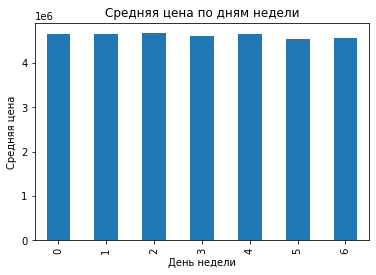

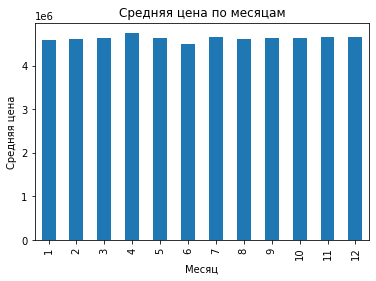

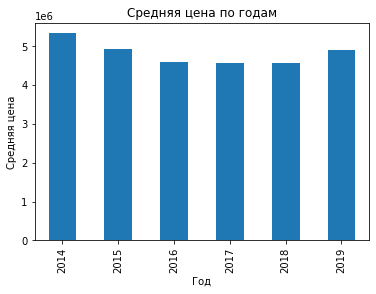

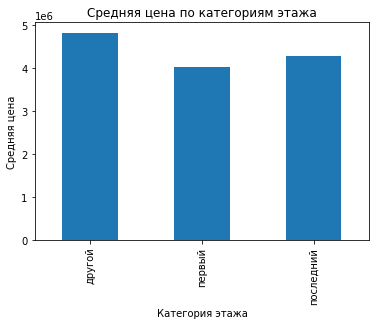

In [14]:
# Группировка данных по дням недели и расчет среднего значения цены
mean_price_by_weekday = data.groupby('weekday')['last_price'].mean()

# Построение barplot для дней недели
mean_price_by_weekday.plot.bar()
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по дням недели')
plt.show()

# Группировка данных по месяцам и расчет среднего значения цены
mean_price_by_month = data.groupby('month')['last_price'].mean()

# Построение barplot для месяцев
mean_price_by_month.plot.bar()
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по месяцам')
plt.show()

# Группировка данных по годам и расчет среднего значения цены
mean_price_by_year = data.groupby('year')['last_price'].mean()

# Построение barplot для годов
mean_price_by_year.plot.bar()
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам')
plt.show()

# Группировка данных по категориям этажа и расчет среднего значения цены
mean_price_by_floor_category = data.groupby('floor_level')['last_price'].mean()

# Построение barplot для категорий этажа
mean_price_by_floor_category.plot.bar()
plt.xlabel('Категория этажа')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по категориям этажа')
plt.show()

In [15]:
# Группируем данные по населённым пунктам и вычисляем количество объявлений в каждом населённом пункте
data_count = data.groupby('locality_name')['total_images'].count().sort_values(ascending=False).head(10)

# Отбираем данные только для топ 10 населённых пунктов по количеству объявлений
data_top10 = data[data['locality_name'].isin(data_count.index)]

# Группируем данные по населённым пунктам и вычисляем среднюю стоимость квадратного метра в каждом населённом пункте
data_mean = data_top10.groupby('locality_name')['price_meter'].mean().sort_values(ascending=False)

# Выделяем топ 1 и топ 10 населённых пунктов по средней стоимости квадратного метра
data_mean_top1 = data_mean.head(1)
data_mean_top10 = data_mean.head(10)

# Группируем данные по населённым пунктам и вычисляем минимальную и максимальную стоимость квадратного метра в каждом населённом пункте
data_minmax = data_top10.groupby('locality_name')['price_meter'].agg(['min', 'max'])

# Вычисляем разницу между максимальной и минимальной стоимостью квадратного метра в каждом населённом пункте
data_minmax['diff'] = data_minmax['max'] - data_minmax['min']

# Сортируем данные по разнице между максимальной и минимальной стоимостью квадратного метра в порядке убывания и выбираем первую строку
data_minmax_sorted = data_minmax.sort_values('diff', ascending=False).head(1)

# Выводим результаты на экран
print('Средняя цена за квадратный метр в топ 10 населённых пунктах с наибольшим числом объявлений:')
print(data_mean_top10)

print('Населённый пункт с самой большой разницей между минимальной и максимальной стоимостью квадратного метра:')
print(data_minmax_sorted.index[0])

Средняя цена за квадратный метр в топ 10 населённых пунктах с наибольшим числом объявлений:
locality_name
Санкт-Петербург      104244.720594
Пушкин                99901.719684
деревня Кудрово       92222.428053
поселок Парголово     90175.913458
поселок Мурино        85681.762601
поселок Шушары        78610.034086
Колпино               75185.478229
Гатчина               68421.902770
Всеволожск            66650.281773
Выборг                57932.878606
Name: price_meter, dtype: float64
Населённый пункт с самой большой разницей между минимальной и максимальной стоимостью квадратного метра:
Санкт-Петербург


In [16]:
data_spb = data.query('locality_name == "Санкт-Петербург"') #создаем новый DataFrame data_spb, который содержит только записи 
#для Санкт-Петербурга.

data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] / 1000).round() #cоздаем новый столбец 
#‘cityCenters_nearest_km’ с расстоянием до центра города в километрах (с округлением до ближайшего км).

pivot_table_spb = data_spb.pivot_table(index='cityCenters_nearest_km', values='price_meter', aggfunc='mean')
#создаем сводную таблицу с расстоянием до центра города в километрах и средней ценой за квадратный метр.

print('Средняя цена за каждый километр в Санкт-Петербурге:')
print(pivot_table_spb)

Средняя цена за каждый километр в Санкт-Петербурге:
                          price_meter
cityCenters_nearest_km               
0.0                     111429.755790
1.0                     115876.872125
2.0                     110713.769705
3.0                     106995.059694
4.0                     112600.055298
5.0                     118755.901540
6.0                     120536.041701
7.0                     114928.435154
8.0                     113439.513837
9.0                     105371.750604
10.0                    106922.853712
11.0                    103486.192238
12.0                    105019.887370
13.0                    105270.043522
14.0                    102990.271777
15.0                    101757.593892
16.0                     98924.028551
17.0                     94633.388642
18.0                     95716.008661
19.0                     97288.886027
20.0                    101582.753497
21.0                     93451.905287
22.0                     90522.51758

/tmp/ipykernel_599/3374535598.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest'] / 1000).round() #cоздаем новый столбец


Как правило стоимость объектов недвижимости в центре города выше, чем в отдаленных районах. Это связано с тем, что в центре города находятся основные достопримечательности, магазины, рестораны и другие объекты инфраструктуры. 
Также стоимость объектов недвижимости может зависеть от расстояния до метро или других видов транспорта. 
Большую роль также играют: состояние объекта, этажность здания, наличие лифта и других удобств. 
Мы можем заметить, что средняя цена за квадратный метр падает с увеличением расстояния от центра города. Например, на расстоянии 0-1 км от центра города средняя цена за квадратный метр составляет 115876.87 рублей, а на расстоянии 20 км - 101582.75 рублей.

### Общий вывод

**Исходя из предоставленных данных можно сделать следующие выводы:**
Был проведен анализ данных о продаже квартир в Санкт-Петербурге и ближайших населенных пунктах.
Были изучены параметры квартир, такие как площадь, цена, число комнат, высота потолков и т.д.
Были изучены факторы, которые могут влиять на стоимость квартиры, такие как расстояние до центра города, этажность здания и т.д.
Была проведена предобработка данных: заполнены пропуски, удалены дубликаты и т.д.
Были построены гистограммы и диаграммы рассеяния для визуализации данных.
Были изучены параметры квартир в центре города и сравнены с параметрами квартир в ближайших населенных пунктах.
Была проведена статистическая оценка данных: рассчитаны средние значения, медианные значения и т.д.

**Исходя из анализа данных можно сделать следующие выводы:**
Стоимость объектов недвижимости в центре города выше, чем в отдаленных районах.
Стоимость объектов недвижимости может зависеть от расстояния до метро или других видов транспорта.
Большую роль также играют: состояние объекта, этажность здания, наличие лифта и других удобств.
Населённый пункт с самой большой разницей между минимальной и максимальной стоимостью квадратного метра - Санкт-Петербург.
Обычно продажа квартир занимает от 1 до 3 месяцев. Продажи, которые занимают менее 45 дней, можно считать быстрыми, а продажи, которые занимают более 230 дней, можно считать необычно долгими

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v3:</b>
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [ ]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [ ]  определены пропущенные значения
- [ ]  заполнены пропущенные значения там, где это возможно
- [ ]  есть пояснение, какие пропущенные значения обнаружены
- [ ]  изменены типы данных
- [ ]  есть пояснение, в каких столбцах изменены типы и почему
- [ ]  устранены неявные дубликаты в названиях населённых пунктов
- [ ]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [ ]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [ ]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [ ]  посчитано и добавлено в таблицу: месяц публикации объявления
- [ ]  посчитано и добавлено в таблицу: год публикации объявления
- [ ]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [ ]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [ ]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [ ]  построены гистограммы для каждого параметра
- [ ]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [ ]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [ ]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [ ]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [ ]  в каждом этапе есть промежуточные выводы
- [ ]  есть общий вывод